In [4]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

In [6]:
from js import fetch
import io







In [8]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
ratings_url = io.BytesIO((await resp.arrayBuffer()).to_py())
boston_df = pd.read_csv(ratings_url)


In [9]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [10]:
boston_df['AGE'].median()

77.5

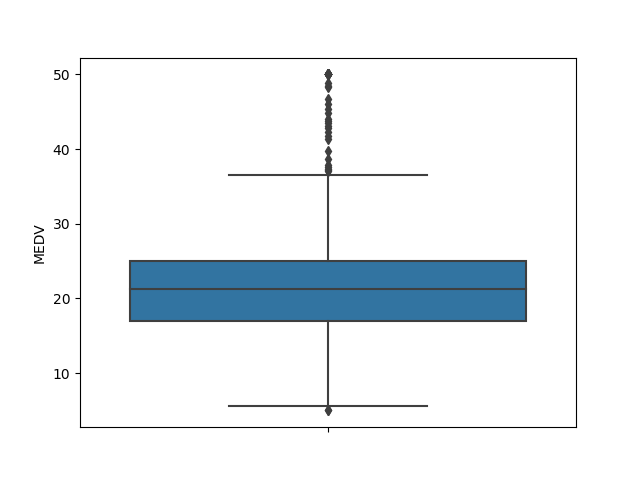

In [12]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.show()

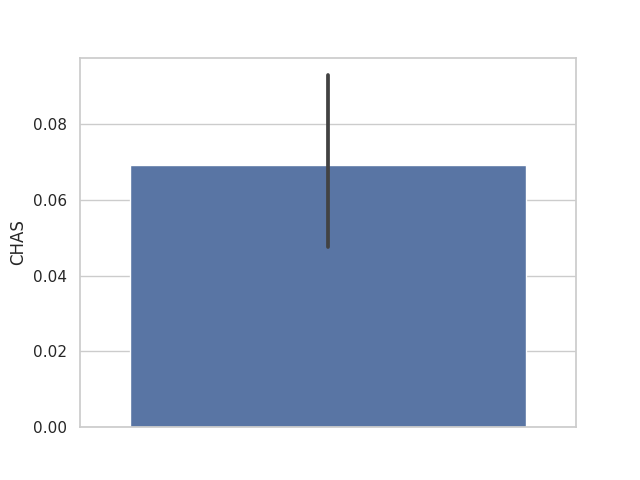

In [13]:
sns.set(style="whitegrid")
ax = sns.barplot(y="CHAS", data=boston_df)
plt.show()

In [48]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'


<class 'TypeError'>: '<=' not supported between instances of 'str' and 'int'

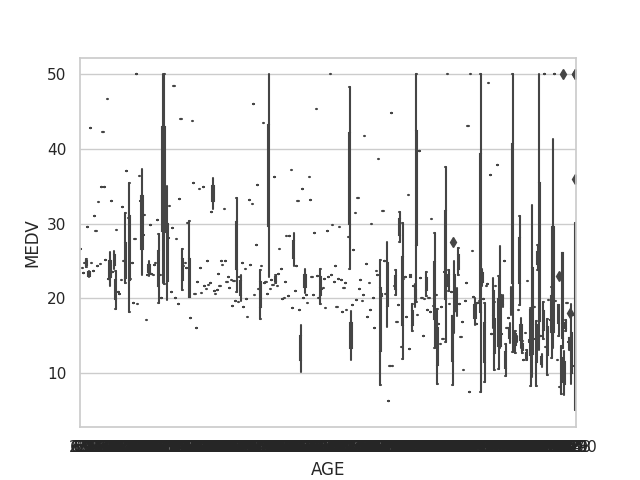

In [35]:
ax = sns.boxplot(x= "AGE", y="MEDV",  data=boston_df)
plt.show()


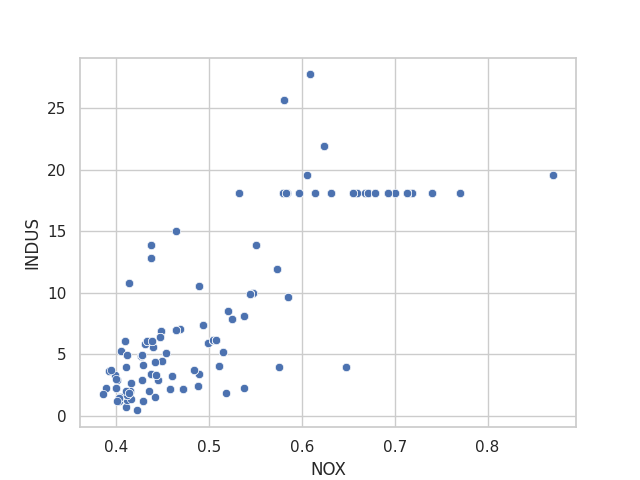

In [38]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
plt.show()


It seems that there is a positive correlation between the proportion of non-retail business acres per town to the Nitric oxide concentrations. Meaning, the more non-retailed acers, the more NOX concentration

<ipython-input-39-3905e342b678>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['PTRATIO'], kde = False)


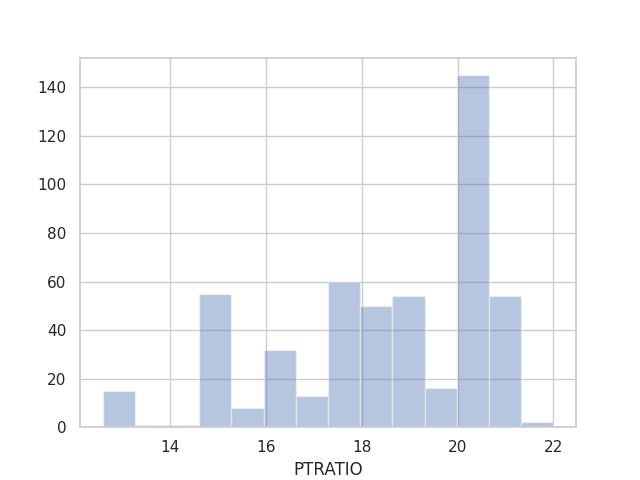

In [39]:
ax = sns.distplot(boston_df['PTRATIO'], kde = False)
plt.show()

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference  in median value of houses bounded by the Charles river")

In [41]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

The p-value is lower than 0.05, therefore, we reject the null-hypothesis and claim that there IS a difference in median value of houses bounded by the Charles river

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference  in Median values of houses for each proportion of owner occupied units built prior to 1940")

In [51]:
boston_df.loc[(boston_df["AGE"] <= 35), "AGE"] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35)&(boston_df["AGE"] < 70), 'AGE'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70), "AGE"] = '70 years and older'

<class 'TypeError'>: '<=' not supported between instances of 'str' and 'int'

In [44]:
forty_lower = boston_df[boston_df["AGE"] == '35 years and younger']["MEDV"]
forty_fiftyseven = boston_df[boston_df["AGE"] == 'between 35 and 70 years']["MEDV"]
fiftyseven_older = boston_df[boston_df["AGE"] == '70 years and older']["MEDV"]

In [45]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

/lib/python3.10/site-packages/scipy/stats/_stats_py.py:3630: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_Statistic: nan, P-Value: nan


State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")


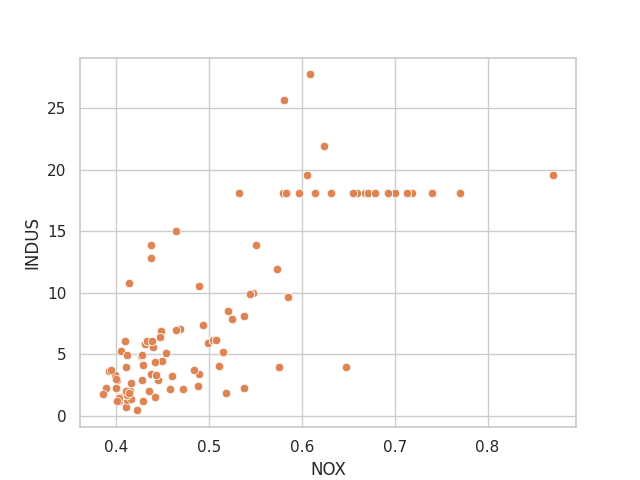

In [53]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
plt.show()

In [55]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

*   $H\_0: β1$ = 0 (additional weighted distance  to the five Boston employment centres has no effect on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (additional weighted distance  to the five Boston employment centres has an effect on the median value of owner occupied homes)

In [57]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           1.21e-08
Time:                        11:30:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in additional weighted distance to the five Boston employment centres on the median value of owner occupied homes